# Offshore Viz Data Exploration

## Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Read Data Source

#### Base File

In [2]:
base_file = pd.read_csv('Data/offshore_agg_data_alltime.csv')
base_file.head()

,c_n_sourceID,c_type,c_n_countries_norm,b_n_jurisdiction_description_norm,count
0,Bahamas Leaks,individual,Angola,Bahamas,1
1,Panama Papers,individual,Lithuania,Seychelles,1
2,Panama Papers,individual,Lithuania,Samoa,1
3,Panama Papers,individual,Liechtenstein,British Anguilla,1
4,Panama Papers,individual,Libya,Panama,1


#### Country File

In [3]:
def format_file(country_file):
    country = country_file.iloc[1,0]
    country_file = country_file.drop(country_file.index[[0,1,2,7,8,9,10]])
    rest = pd.DataFrame([[country_file.iloc[1,3],country_file.iloc[1,4]],[country_file.iloc[2,3],country_file.iloc[2,4]],[country_file.iloc[3,3],country_file.iloc[3,4]]])
    country_file.columns = [1,2,3,4,5,6]
    country_file = country_file.drop([3,4,5,6], axis=1)
    rest.columns=[1,2]
    country_file = pd.concat([country_file, rest], axis=0)
    country_file.columns = ['Attributes','Values']
    country_file['Attributes'] = country_file['Attributes'].apply(lambda x: x.replace(':',""))
    country_file = country_file.append(pd.DataFrame([['Country',country]], columns=country_file.columns))
    country_dataframe = pd.DataFrame([list(country_file.iloc[:,1])],columns=list(country_file.iloc[:,0]))
    return country_dataframe

directory = 'Data/'
country_file = pd.DataFrame([])
for filename in os.listdir(directory):
    if 'csv' not in filename:
        if country_file.empty:
            country_file = pd.read_excel(os.path.join(directory, filename))
            country_file = format_file(country_file)
        else:
            country_file = pd.concat([country_file, format_file(pd.read_excel(os.path.join(directory, filename)))], axis=0)
    

country_file.head()


,Ranking,Banding,Master-index Score,Number of Sources,Type Of Governance,Government Effectiveness,Civil Liberties & Political Rights,Freedom Of The Press,Freedom Of Religion,Political Stability,...,Corruption,Absence Of Violence,Arms Export Controls,Counterfeiting,Exploitative Labor,Natural Resources Industry Controls,Political,Economic,Criminal,Country
0,7 / 247 Countries,VERY LOW,9.638485,252,1.490284,1.801270,1.322267,1.625656,-0.414714,1.562173,...,1.903795,1.716715,0.275612,0.129254,0.173210,1.441943,1.454697,0.930744,0.589927,SWITZERLAND
0,211 / 247 Countries,HIGH,2.007872,266,-0.774760,-0.134294,-1.443132,-1.933534,-1.483291,-0.256945,...,-0.043698,-0.401358,-1.160592,-9.438460,-1.861874,1.441943,-0.665023,0.291194,-1.112536,CHINA
0,18 / 247 Countries,VERY LOW,9.180565,266,1.431423,1.234093,1.322267,0.753376,0.895499,1.092128,...,1.677914,0.580815,1.370331,-0.123337,0.173210,0.470139,1.147524,0.917150,0.205168,UNITED KINGDOM
0,46 / 247 Countries,LOW,8.218161,238,0.849669,1.186499,0.038105,0.212651,0.000000,1.523018,...,1.429103,0.000000,0.000000,-7.072051,0.173210,-0.716602,0.891202,0.734665,-0.203397,HONG KONG
0,151 / 247 Countries,MEDIUM,4.263150,272,0.280603,-0.206640,-0.031381,-0.155029,-1.483291,-0.223280,...,-0.185633,0.428744,-0.096287,0.054895,-0.452386,1.140016,-0.346707,0.139005,-0.031069,INDONESIA


## Data Preprocessing

#### Change Column Names

In [4]:
base_file.columns = ['Source','Type','Country','Offshore_Location','Count']

#### Aggregate Data

In [5]:
base_file_pro = pd.DataFrame([])
for name, group in base_file.groupby(['Country','Offshore_Location']):
    base_file_pro = base_file_pro.append([list(name + (group['Count'].sum(),))])
base_file_pro.columns=['Country','Offshore_Location','Count']
base_file_pro.head()

,Country,Offshore_Location,Count
0,Albania,Bahamas,1
0,Albania,British Anguilla,4
0,Albania,British Virgin Islands,13
0,Albania,Cayman Islands,3
0,Albania,Jersey,1


#### Handle Special Countries

In [6]:
"Russia" in list(base_file_pro["Country"])

True

In [7]:
country_file = country_file.replace({'Country':{'RUSSIAN FEDERATION':'RUSSIA','UNITED STATES MINOR OUTLYING ISLANDS': 'UNITED STATES'}})

In [8]:
def find_count(country):
    for name, group in base_file_pro.groupby(['Country']):
        if name.upper() == country:
            return group["Count"].sum()
        
    return 0
            
country_file["Count"] = country_file["Country"].apply(find_count)
country_file

,Ranking,Banding,Master-index Score,Number of Sources,Type Of Governance,Government Effectiveness,Civil Liberties & Political Rights,Freedom Of The Press,Freedom Of Religion,Political Stability,...,Absence Of Violence,Arms Export Controls,Counterfeiting,Exploitative Labor,Natural Resources Industry Controls,Political,Economic,Criminal,Country,Count
0,7 / 247 Countries,VERY LOW,9.638485,252,1.490284,1.801270,1.322267,1.625656,-0.414714,1.562173,...,1.716715,0.275612,0.129254,0.173210,1.441943,1.454697,0.930744,0.589927,SWITZERLAND,2833
0,211 / 247 Countries,HIGH,2.007872,266,-0.774760,-0.134294,-1.443132,-1.933534,-1.483291,-0.256945,...,-0.401358,-1.160592,-9.438460,-1.861874,1.441943,-0.665023,0.291194,-1.112536,CHINA,29211
0,18 / 247 Countries,VERY LOW,9.180565,266,1.431423,1.234093,1.322267,0.753376,0.895499,1.092128,...,0.580815,1.370331,-0.123337,0.173210,0.470139,1.147524,0.917150,0.205168,UNITED KINGDOM,5210
0,46 / 247 Countries,LOW,8.218161,238,0.849669,1.186499,0.038105,0.212651,0.000000,1.523018,...,0.000000,0.000000,-7.072051,0.173210,-0.716602,0.891202,0.734665,-0.203397,HONG KONG,23318
0,151 / 247 Countries,MEDIUM,4.263150,272,0.280603,-0.206640,-0.031381,-0.155029,-1.483291,-0.223280,...,0.428744,-0.096287,0.054895,-0.452386,1.140016,-0.346707,0.139005,-0.031069,INDONESIA,3363
0,93 / 247 Countries,MEDIUM,5.828538,268,0.017899,0.302185,-0.334860,-0.645724,-1.483291,0.673813,...,0.957086,-1.160592,-0.616274,-0.342880,1.441943,-0.041555,0.477881,-0.030735,MALAYSIA,2841
0,180 / 247 Countries,HIGH,3.196633,270,-0.882874,-0.405184,-1.443132,-0.998070,-1.483291,-0.611220,...,-1.726482,0.011047,0.083705,-0.456928,1.441943,-0.567387,0.126431,-0.287016,RUSSIA,3593
0,16 / 247 Countries,VERY LOW,9.213660,254,0.205886,1.581766,-0.334860,-0.703330,-0.414714,1.872194,...,1.237785,-0.136488,-0.180649,0.173210,1.441943,0.986649,0.891002,0.523077,SINGAPORE,5625
0,27 / 247 Countries,LOW,8.943269,211,1.498484,1.582729,1.322267,0.687832,0.895499,0.899935,...,0.590500,-1.087872,0.118498,0.173210,1.441943,1.137364,0.515402,0.370106,TAIWAN,19033
0,112 / 247 Countries,MEDIUM,5.171483,100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.105770,0.173210,-0.716602,0.000000,0.149746,-0.077094,UNITED STATES,8496


In [154]:
country_file.to_csv('Data.csv')

## Data Exploration

#### Scatter Matrix

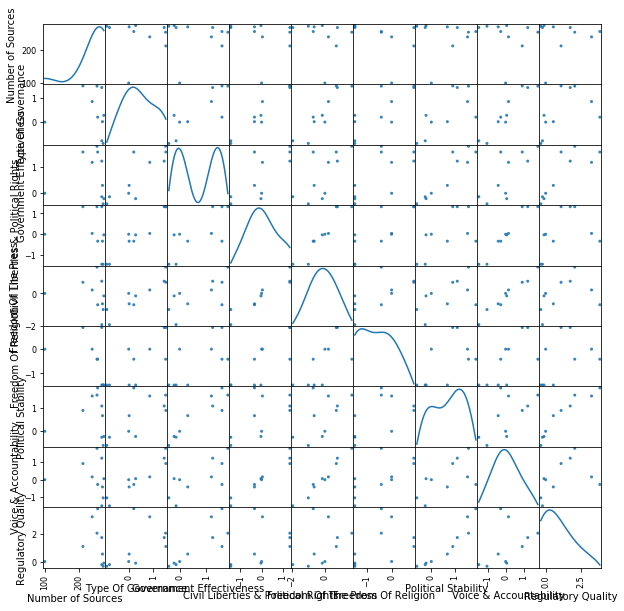

In [15]:
from pandas.plotting import scatter_matrix
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
matrix = scatter_matrix(country_file.select_dtypes(include=numerics).iloc[:,1:10], alpha=0.9, diagonal='kde',figsize=(10,10))
plt.show()

#### Line Chart

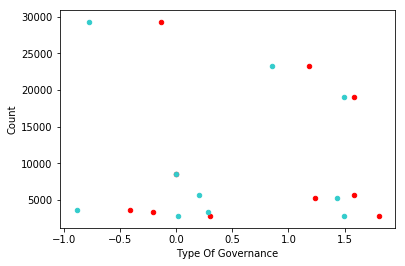

In [8]:
a = country_file.plot(x=country_file.columns[5], y='Count',kind='scatter',color=(1,0,0))
country_file.plot(x=country_file.columns[4], y='Count',kind='scatter',color = (0.2,0.8,0.8),ax=a)
plt.show()

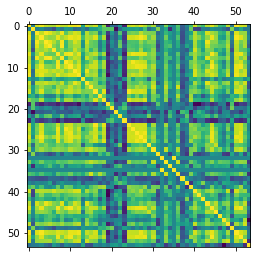

In [159]:
plt.matshow(country_file.corr())
plt.show()

In [9]:
country_file.corr()

,Master-index Score,Number of Sources,Type Of Governance,Government Effectiveness,Civil Liberties & Political Rights,Freedom Of The Press,Freedom Of Religion,Political Stability,Voice & Accountability,Regulatory Quality,...,Corruption,Absence Of Violence,Arms Export Controls,Counterfeiting,Exploitative Labor,Natural Resources Industry Controls,Political,Economic,Criminal,Count
Master-index Score,1.000000e+00,-3.676379e-02,8.763373e-01,0.955860,8.230661e-01,7.803889e-01,7.545628e-01,9.200522e-01,8.216358e-01,8.163293e-01,...,9.174888e-01,7.165758e-01,0.394995,3.492541e-01,8.072449e-01,-1.055333e-01,9.844147e-01,8.763831e-01,8.438990e-01,-1.853894e-01
Number of Sources,-3.676379e-02,1.000000e+00,-5.518906e-02,0.038931,-1.716908e-01,-1.974348e-01,-4.124316e-01,7.913869e-02,-1.194727e-01,1.192728e-01,...,1.104344e-01,3.357167e-02,0.006937,-1.637292e-01,-3.520935e-01,6.369132e-01,-5.021133e-02,2.590092e-01,-8.271222e-02,-9.835614e-02
Type Of Governance,8.763373e-01,-5.518906e-02,1.000000e+00,0.832154,9.735159e-01,9.120108e-01,7.835703e-01,7.032566e-01,9.492841e-01,5.304483e-01,...,7.525370e-01,6.697382e-01,0.382417,2.992595e-01,6.842641e-01,-1.413075e-01,9.006118e-01,7.005688e-01,7.137803e-01,-8.041467e-02
Government Effectiveness,9.558597e-01,3.893137e-02,8.321540e-01,1.000000,7.505254e-01,6.851926e-01,7.033551e-01,9.326373e-01,7.444162e-01,8.306497e-01,...,9.392051e-01,7.143487e-01,0.239735,1.612049e-01,6.286400e-01,2.639056e-02,9.748065e-01,9.044518e-01,7.322945e-01,1.499608e-02
Civil Liberties & Political Rights,8.230661e-01,-1.716908e-01,9.735159e-01,0.750525,1.000000e+00,9.320007e-01,7.834460e-01,5.985536e-01,9.703745e-01,3.912020e-01,...,6.624329e-01,6.729995e-01,0.402315,4.399100e-01,6.991652e-01,-1.348301e-01,8.426192e-01,6.029781e-01,7.422457e-01,-1.970766e-01
Freedom Of The Press,7.803889e-01,-1.974348e-01,9.120108e-01,0.685193,9.320007e-01,1.000000e+00,6.702515e-01,5.547556e-01,9.808846e-01,3.811831e-01,...,6.079492e-01,5.680353e-01,0.505345,4.810446e-01,7.728697e-01,-2.188153e-01,8.063003e-01,5.472285e-01,7.612182e-01,-3.119658e-01
Freedom Of Religion,7.545628e-01,-4.124316e-01,7.835703e-01,0.703355,7.834460e-01,6.702515e-01,1.000000e+00,5.574637e-01,6.981113e-01,4.780647e-01,...,6.181314e-01,3.152067e-01,0.413029,2.080976e-01,6.741082e-01,-4.139609e-01,7.840851e-01,5.435304e-01,5.178612e-01,1.400652e-01
Political Stability,9.200522e-01,7.913869e-02,7.032566e-01,0.932637,5.985536e-01,5.547556e-01,5.574637e-01,1.000000e+00,6.069088e-01,9.421638e-01,...,9.637905e-01,7.475144e-01,0.246720,7.478465e-02,6.246708e-01,-8.886179e-02,9.010597e-01,9.352341e-01,6.777131e-01,-3.714517e-02
Voice & Accountability,8.216358e-01,-1.194727e-01,9.492841e-01,0.744416,9.703745e-01,9.808846e-01,6.981113e-01,6.069088e-01,1.000000e+00,4.178570e-01,...,6.830186e-01,6.585198e-01,0.510883,4.722631e-01,7.256753e-01,-1.269852e-01,8.482777e-01,6.310990e-01,7.781641e-01,-3.046162e-01
Regulatory Quality,8.163293e-01,1.192728e-01,5.304483e-01,0.830650,3.912020e-01,3.811831e-01,4.780647e-01,9.421638e-01,4.178570e-01,1.000000e+00,...,9.017296e-01,5.487093e-01,0.307046,-3.543176e-02,5.714985e-01,-1.695252e-01,7.906797e-01,8.653733e-01,5.621743e-01,2.890462e-02


#### Simple Count

In [38]:
print("Countries: %d\n" %len(base_file_pro.Country.unique()))
print("Offshore_Locations: %d\n" %len(base_file_pro.Offshore_Location.unique()))
print(base_file_pro.Count.describe())

Countries: 185

Offshore_Locations: 38

count     1432.000000
mean        99.358939
std        798.363523
min          1.000000
25%          2.000000
50%          5.000000
75%         21.000000
max      18349.000000
Name: Count, dtype: float64


#### Pivot Table

In [31]:
pd.pivot_table(base_file_pro, values='Count', index=['Country'],columns=['Offshore_Location']).fillna(0).head()

Offshore_Location,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman Islands,Cook Islands,Costa Rica,Cyprus,...,Saint Kitts and Nevis,Samoa,Seychelles,Singapore,St. Lucia,State of Delaware,United Kingdom,United States Of America,Vanuatu,Wyoming
Country,,,,,,,,,,,,,,,,,,,,,
Albania,1.0,0.0,0.0,4.0,13.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,1.0,2.0,2.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
American Samoa,4.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,3.0,0.0,0.0,0.0,13.0,0.0,2.0,2.0,0.0,0.0,...,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Angola,1.0,0.0,0.0,3.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Bar Chart

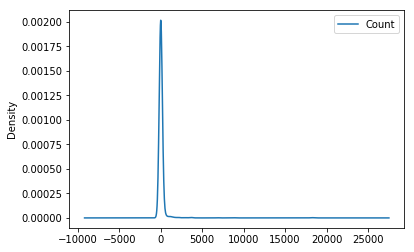

In [43]:
base_file_pro.plot.kde()
plt.show()